<a href="https://colab.research.google.com/github/krittametproject/THFOOD17-classification/blob/main/VAR_NetRate_Trends(m)_Season(w).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Monthly Trends, Weekly Seasonal</h1>

*CONTENT15: Invert the transformation to get the real forecast
https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
%cd drive/MyDrive/net_rate

[Errno 2] No such file or directory: 'drive/MyDrive/net_rate'
/content/drive/MyDrive/net_rate


<h1>Change Start Year HERE!!</h1>


In [77]:
start_year = 2017

In [78]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [79]:
def parser(s):
    return datetime.strptime(s, '%m/%d/%Y') #format code list https://www.programiz.com/python-programming/datetime/strptime
def plot_net_gmv(net_gmv):
  plt.figure(figsize=(12,6))
  net_rate, = plt.plot(net_gmv['net_rate'])
  gmv_rate, = plt.plot(net_gmv['gmv_rate'], color='red')
  for year in range(start_year, 2022):
      plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.3)
  plt.legend(['net_rate', 'gmv_rate'], fontsize=16)

In [80]:
df = pd.read_csv('train_7-1-2017.csv',parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
#pd.set_option('display.max_rows', df.shape[0]+1)
df.head()
if start_year == 2020:
  df = df[(df.index.year>=2020) & (df.index.month >= 7)]

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1438 entries, 2017-07-01 to 2021-06-07
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   net_rate  1438 non-null   float64
 1   gmv_rate  1438 non-null   float64
dtypes: float64(2)
memory usage: 33.7 KB


In [82]:
net_gmv = df.asfreq(pd.infer_freq(df.index)).dropna()
net_gmv

,net_rate,gmv_rate
date,,
2017-07-01,0.759932,0.786733
2017-07-02,0.616125,0.661993
2017-07-03,0.780197,0.781314
2017-07-04,0.789492,0.774854
2017-07-05,0.787336,0.788394
...,...,...
2021-06-03,0.860099,0.811376
2021-06-04,0.884038,0.817524
2021-06-05,0.936399,0.857167


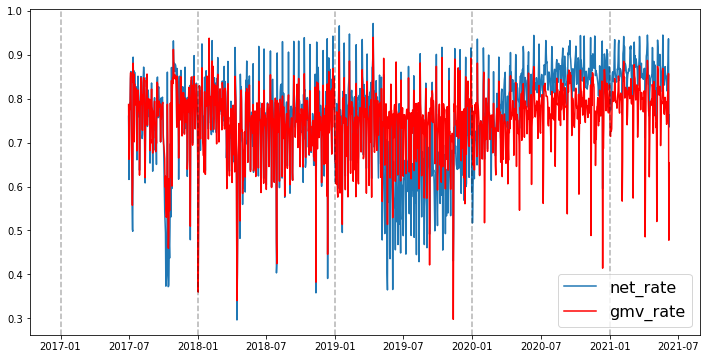

In [83]:
plot_net_gmv(net_gmv)

<h1><b>Normalize</b></h1>

In [84]:
avgs = net_gmv.mean()
devs = net_gmv.std()
print('avg:',avgs,'\n')
print('dev:',devs)

avg: net_rate    0.761902
gmv_rate    0.751603
dtype: float64 

dev: net_rate    0.112037
gmv_rate    0.075914
dtype: float64


In [85]:
for col in net_gmv:
    net_gmv[col] = (net_gmv[col] - avgs.loc[col]) / devs.loc[col]

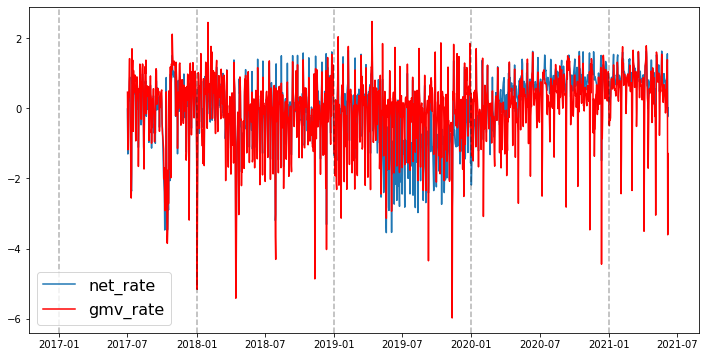

In [86]:
plot_net_gmv(net_gmv)

<h1>Take First Difference to Remove Trend</h1>

In [87]:
net_gmv = net_gmv.diff().dropna()

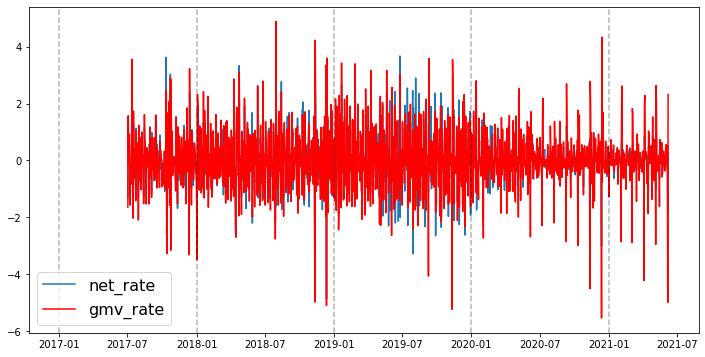

In [88]:
plot_net_gmv(net_gmv)

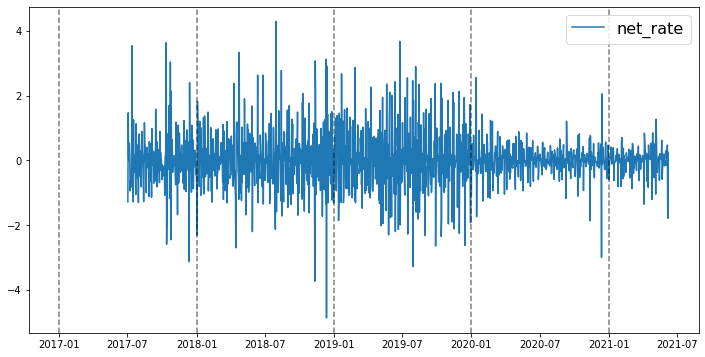

In [89]:
plt.figure(figsize=(12,6))
net_rate, = plt.plot(net_gmv['net_rate'])
for year in range(start_year, 2022):
  plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
plt.legend(['net_rate'], fontsize=16)

<h1>Remove Increasing Volatility</h1>

In [90]:
volatility = net_gmv.groupby([net_gmv.index.year, net_gmv.index.month]).std()
volatility = [[idx, n, g] for idx, n, g in zip(volatility.index, volatility['net_rate'], volatility['gmv_rate'])]
volatility

[[(2017, 7), 0.9858527346987602, 1.1974330619629763],
 [(2017, 8), 0.5793414867371168, 0.7804967715510145],
 [(2017, 9), 0.5661771496888353, 0.604091597678811],
 [(2017, 10), 1.3098536016312008, 1.4392827216014825],
 [(2017, 11), 0.6488189243527271, 0.6944869115452313],
 [(2017, 12), 0.8918939481637516, 1.102865638654083],
 [(2018, 1), 0.9392776255860095, 1.3652589336092198],
 [(2018, 2), 0.6238322627453237, 0.7966305234826553],
 [(2018, 3), 0.5923469182335185, 0.7899589179526629],
 [(2018, 4), 1.1264977191957253, 1.39500860984765],
 [(2018, 5), 0.869377548048657, 0.9182744337016122],
 [(2018, 6), 0.8760187443674933, 1.0522629188789545],
 [(2018, 7), 1.0997381739324619, 1.3770011766644885],
 [(2018, 8), 0.9806728698076178, 1.0060156854393005],
 [(2018, 9), 0.7919734477832058, 0.8914353482046331],
 [(2018, 10), 0.8909095313046507, 0.8061057487084986],
 [(2018, 11), 1.1578132005972694, 1.4657472975225512],
 [(2018, 12), 1.473757477069726, 1.6662354842844245],
 [(2019, 1), 1.0785727960256

In [91]:
net_gmv_y_m = [(i.year, i.month) for i in net_gmv.index]
net_gmv['y-m'] = net_gmv_y_m

In [92]:
net_gmv['net_vol'] = [vol[1] for ym in net_gmv['y-m'] for vol in volatility if ym == vol[0]]
net_gmv['gmv_vol'] = [vol[2] for ym in net_gmv['y-m'] for vol in volatility if ym == vol[0]]

In [93]:
net_gmv['net_rate'] = net_gmv['net_rate'] / net_gmv['net_vol']
net_gmv['gmv_rate'] = net_gmv['gmv_rate'] / net_gmv['gmv_vol']
net_gmv.head()

,net_rate,gmv_rate,y-m,net_vol,gmv_vol
date,,,,,
2017-07-02,-1.301992,-1.372240,"(2017, 7)",0.985853,1.197433
2017-07-03,1.485465,1.312625,"(2017, 7)",0.985853,1.197433
2017-07-04,0.084154,-0.071065,"(2017, 7)",0.985853,1.197433
2017-07-05,-0.019518,0.148951,"(2017, 7)",0.985853,1.197433
2017-07-06,0.533398,0.775412,"(2017, 7)",0.985853,1.197433


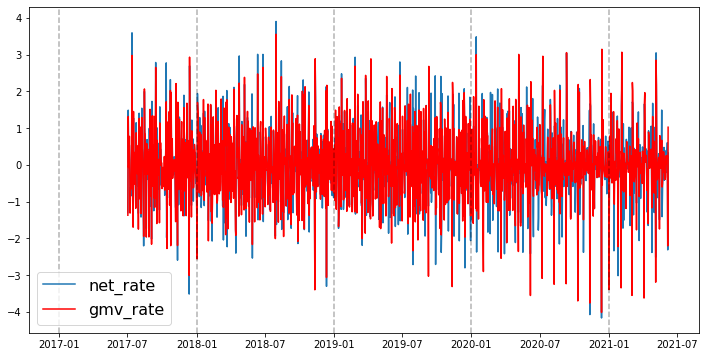

In [94]:
plot_net_gmv(net_gmv)

<h1>Remove Seasonality</h1>

In [95]:
week_avgs = net_gmv.groupby([net_gmv.index.year, net_gmv.index.month, net_gmv.index.week]).mean()
week_avgs = [[idx, n, g] for idx, n, g in zip(week_avgs.index, week_avgs['net_rate'], week_avgs['gmv_rate'])]
week_avgs

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


[[(2017, 7, 26), -1.3019919046591242, -1.3722400266131836],
 [(2017, 7, 27), 0.09174150728118388, 0.02041436483866394],
 [(2017, 7, 28), 0.042271286863361394, 0.04226970678083397],
 [(2017, 7, 29), -0.07613847275972874, -0.0325234666161924],
 [(2017, 7, 30), -0.03078970452482691, -0.08688564664794637],
 [(2017, 7, 31), 0.5953567863196486, 1.0356987104133677],
 [(2017, 8, 31), 0.016822401348068155, 0.029005267705802695],
 [(2017, 8, 32), -0.1562447277817984, -0.1489596607713938],
 [(2017, 8, 33), 0.2165357545758792, 0.17152337083585842],
 [(2017, 8, 34), -0.1835080309602022, -0.13900967876976364],
 [(2017, 8, 35), 0.7023424537061258, 0.5899185931106756],
 [(2017, 9, 35), -1.0550742801417197, -1.05858662013164],
 [(2017, 9, 36), 0.10743301154103926, 0.1754251882410812],
 [(2017, 9, 37), 0.16664821163935603, 0.0866965197177761],
 [(2017, 9, 38), -0.12434247598514732, -0.18239973860800288],
 [(2017, 9, 39), 0.20496823929152697, 0.32599292347986303],
 [(2017, 10, 39), -0.4554618878772831, -

In [96]:
net_gmv['y-m-w'] = [(i.year, i.month, i.week) for i in net_gmv.index]
net_gmv

,net_rate,gmv_rate,y-m,net_vol,gmv_vol,y-m-w
date,,,,,,
2017-07-02,-1.301992,-1.372240,"(2017, 7)",0.985853,1.197433,"(2017, 7, 26)"
2017-07-03,1.485465,1.312625,"(2017, 7)",0.985853,1.197433,"(2017, 7, 27)"
2017-07-04,0.084154,-0.071065,"(2017, 7)",0.985853,1.197433,"(2017, 7, 27)"
2017-07-05,-0.019518,0.148951,"(2017, 7)",0.985853,1.197433,"(2017, 7, 27)"
2017-07-06,0.533398,0.775412,"(2017, 7)",0.985853,1.197433,"(2017, 7, 27)"
...,...,...,...,...,...,...
2021-06-03,0.095611,0.088528,"(2021, 6)",0.776202,2.265923,"(2021, 6, 22)"
2021-06-04,0.275273,0.035742,"(2021, 6)",0.776202,2.265923,"(2021, 6, 22)"
2021-06-05,0.602112,0.230464,"(2021, 6)",0.776202,2.265923,"(2021, 6, 22)"


In [97]:
net_gmv['net_week_avg'] = [week[1] for ymw in net_gmv['y-m-w'] for week in week_avgs if ymw == week[0]]  
net_gmv['gmv_week_avg'] = [week[2] for ymw in net_gmv['y-m-w'] for week in week_avgs if ymw == week[0]] 
net_gmv.head()

,net_rate,gmv_rate,y-m,net_vol,gmv_vol,y-m-w,net_week_avg,gmv_week_avg
date,,,,,,,,
2017-07-02,-1.301992,-1.372240,"(2017, 7)",0.985853,1.197433,"(2017, 7, 26)",-1.301992,-1.372240
2017-07-03,1.485465,1.312625,"(2017, 7)",0.985853,1.197433,"(2017, 7, 27)",0.091742,0.020414
2017-07-04,0.084154,-0.071065,"(2017, 7)",0.985853,1.197433,"(2017, 7, 27)",0.091742,0.020414
2017-07-05,-0.019518,0.148951,"(2017, 7)",0.985853,1.197433,"(2017, 7, 27)",0.091742,0.020414
2017-07-06,0.533398,0.775412,"(2017, 7)",0.985853,1.197433,"(2017, 7, 27)",0.091742,0.020414


In [98]:
net_gmv['net_rate'] = net_gmv['net_rate'] - net_gmv['net_week_avg']
net_gmv['gmv_rate'] = net_gmv['gmv_rate'] - net_gmv['gmv_week_avg']
net_gmv

,net_rate,gmv_rate,y-m,net_vol,gmv_vol,y-m-w,net_week_avg,gmv_week_avg
date,,,,,,,,
2017-07-02,0.000000,0.000000,"(2017, 7)",0.985853,1.197433,"(2017, 7, 26)",-1.301992,-1.372240
2017-07-03,1.393724,1.292211,"(2017, 7)",0.985853,1.197433,"(2017, 7, 27)",0.091742,0.020414
2017-07-04,-0.007587,-0.091479,"(2017, 7)",0.985853,1.197433,"(2017, 7, 27)",0.091742,0.020414
2017-07-05,-0.111259,0.128537,"(2017, 7)",0.985853,1.197433,"(2017, 7, 27)",0.091742,0.020414
2017-07-06,0.441657,0.754997,"(2017, 7)",0.985853,1.197433,"(2017, 7, 27)",0.091742,0.020414
...,...,...,...,...,...,...,...,...
2021-06-03,0.288836,0.344218,"(2021, 6)",0.776202,2.265923,"(2021, 6, 22)",-0.193225,-0.255690
2021-06-04,0.468498,0.291432,"(2021, 6)",0.776202,2.265923,"(2021, 6, 22)",-0.193225,-0.255690
2021-06-05,0.795337,0.486154,"(2021, 6)",0.776202,2.265923,"(2021, 6, 22)",-0.193225,-0.255690


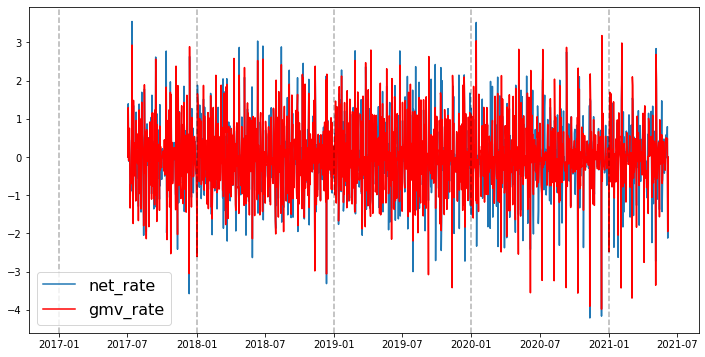

In [99]:
plot_net_gmv(net_gmv)

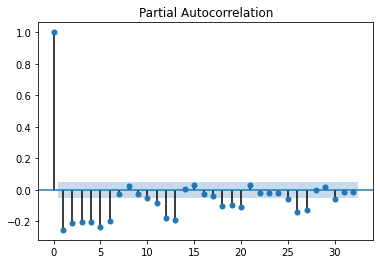

In [100]:
plot_pacf(net_gmv['net_rate'])
plt.show()

In [101]:
for lag in range(1, 14):
    heater_series = net_gmv['gmv_rate'].iloc[lag:]
    lagged_net_rate_series = net_gmv['net_rate'].iloc[:-lag]
    print('Lag: %s'%lag)
    print(pearsonr(heater_series, lagged_net_rate_series))
    print('------')

Lag: 1
(-0.16756403129094855, 1.6646518460089557e-10)
------
Lag: 2
(-0.1242191720647542, 2.36093441430433e-06)
------
Lag: 3
(-0.07902725265999272, 0.002747202465686818)
------
Lag: 4
(-0.04936291632833439, 0.061742451486867446)
------
Lag: 5
(-0.07433696832470475, 0.0048856051249176755)
------
Lag: 6
(-0.021178081188170095, 0.42340609384221617)
------
Lag: 7
(0.17881026742403217, 9.704485313523719e-12)
------
Lag: 8
(0.06904870333824603, 0.009027270806885613)
------
Lag: 9
(-0.052266523418267534, 0.04830061937968849)
------
Lag: 10
(-0.07263721247534626, 0.006048501771592986)
------
Lag: 11
(-0.0442992991129807, 0.09448440482470633)
------
Lag: 12
(-0.07847708874305209, 0.0030325590532844036)
------
Lag: 13
(-0.043156616557255036, 0.10354967030293552)
------


<h1>Fit a VAR Model</h1>

In [102]:
net_gmv = net_gmv[['net_rate', 'gmv_rate']]

In [103]:
model_fit = VAR(net_gmv)
model_fit = model_fit.fit(maxlags=13)

In [104]:
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 19, Jul, 2021
Time:                     06:34:03
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -2.25650
Nobs:                     1424.00    HQIC:                  -2.38149
Log likelihood:          -2238.46    FPE:                  0.0857774
AIC:                     -2.45601    Det(Omega_mle):       0.0826149
--------------------------------------------------------------------
Results for equation net_rate
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.000277         0.020924            0.013           0.989
L1.net_rate         -0.474343         0.056116           -8.453           0.000
L1.gmv_rate         -0.089288         0.057332           -1.5

<h1>FINAL MODEL</h1>
<h2>criterion : p val < 0.05</h2>

net_rate_hat = -0.474343*n[t-1]-0.383739*n[t-2]-0.139954*g[t-2]-0.347554*n[t-3]-0.148409*g[t-3]-0.282664*n[t-4]-0.163946*g[t-4]-0.282325*n[t-5]-0.248139*n[t-6]-0.138854*n[t-7]-0.257319*g[t-8]-0.222409*g[t-9]-0.229242*g[t-11]-0.15923*[t-12]-0.111773*n[t-13]
```
**NOTE 
n = net_gmv['net_rate']
g = net_gmv['gmv_rate']
```




<h1>Forecast the NET RATE for the next 30 days</h1>

In [105]:
lag_order = model_fit.k_ar #get lag order
forecast_30 = model_fit.forecast(net_gmv.values[-lag_order:], 30) #method1
forecast_29 = model_fit.forecast(net_gmv.values[-lag_order:], 29) #method2

In [106]:
#model_fit.plot_forecast(30)

<h1>Validation</h1>

In [107]:
def parser_val(s):
    return datetime.strptime(s, '%Y-%m-%d')
def invert_transformation(df_train, df_forecast):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    df_fc = pd.DataFrame(data={'net_rate':df_fc[:,0]})
    df_fc['forecast_convert'] = df_train['net_rate'].iloc[-1] + df_fc['net_rate'].cumsum()
    return df_fc

<h1>Method 1 Convert to real value</h1>

In [108]:
df3 = pd.read_csv('val.csv',parse_dates=[0], index_col=0, squeeze=True, date_parser=parser_val)
net_gmv_val = df3
result = invert_transformation(net_gmv_val, forecast_30)
result.index = net_gmv_val.index
result['actual'] = net_gmv_val['net_rate']
data_convert={'forecast':result['forecast_convert'], 'actual':result['actual']}

<h1>Method 2 transform val dataset same as train dataset</h1>

In [109]:
df2 = pd.read_csv('val.csv',parse_dates=[0], index_col=0, squeeze=True, date_parser=parser_val)
net_gmv_val = df2.asfreq(pd.infer_freq(df2.index)).dropna()
#Normalize
avgs_val = net_gmv_val.mean()
devs_val = net_gmv_val.std()
for col in net_gmv_val:
    net_gmv_val[col] = (net_gmv_val[col] - avgs_val.loc[col]) / devs_val.loc[col]
#First Difference to Remove Trend
#print(len(net_gmv_val['net_rate'])) 30
net_gmv_val = net_gmv_val.diff().dropna()
#print(len(net_gmv_val['net_rate'])) 29
#Remove Increasing Volatility
volatility_val = net_gmv_val.groupby([net_gmv_val.index.year, net_gmv_val.index.month]).std()
volatility_val = [[idx, n, g] for idx, n, g in zip(volatility_val.index, volatility_val['net_rate'], volatility_val['gmv_rate'])]

net_gmv_y_m_val = [(i.year, i.month) for i in net_gmv_val.index]
net_gmv_val['y-m'] = net_gmv_y_m_val

net_gmv_val['net_vol'] = [vol[1] for ym in net_gmv_val['y-m'] for vol in volatility_val if ym == vol[0]] 
net_gmv_val['gmv_vol'] = [vol[2] for ym in net_gmv_val['y-m'] for vol in volatility_val if ym == vol[0]]

net_gmv_val['net_rate'] = net_gmv_val['net_rate'] / net_gmv_val['net_vol']
net_gmv_val['gmv_rate'] = net_gmv_val['gmv_rate'] / net_gmv_val['gmv_vol']

#Remove Seasonality
week_avgs_val = net_gmv_val.groupby([net_gmv_val.index.year, net_gmv_val.index.month, net_gmv_val.index.week]).mean()
week_avgs_val = [[idx, n, g] for idx, n, g in zip(week_avgs_val.index, week_avgs_val['net_rate'], week_avgs_val['gmv_rate'])]
net_gmv_val['y-m-w'] = [(i.year, i.month, i.week) for i in net_gmv_val.index]

net_gmv_val['net_week_avg'] = [week[1] for ymw in net_gmv_val['y-m-w'] for week in week_avgs_val if ymw == week[0]]  
net_gmv_val['gmv_week_avg'] = [week[2] for ymw in net_gmv_val['y-m-w'] for week in week_avgs_val if ymw == week[0]]

net_gmv_val['net_rate'] = net_gmv_val['net_rate'] - net_gmv_val['net_week_avg']
net_gmv_val['gmv_rate'] = net_gmv_val['gmv_rate'] - net_gmv_val['gmv_week_avg']

net_gmv_val

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)


,net_rate,gmv_rate,y-m,net_vol,gmv_vol,y-m-w,net_week_avg,gmv_week_avg
date,,,,,,,,
2021-06-09,0.915770,0.624179,"(2021, 6)",0.969053,0.857145,"(2021, 6, 23)",0.053581,0.108113
2021-06-10,-0.789978,-0.560988,"(2021, 6)",0.969053,0.857145,"(2021, 6, 23)",0.053581,0.108113
2021-06-11,-0.173279,-0.560800,"(2021, 6)",0.969053,0.857145,"(2021, 6, 23)",0.053581,0.108113
2021-06-12,1.586039,1.815829,"(2021, 6)",0.969053,0.857145,"(2021, 6, 23)",0.053581,0.108113
2021-06-13,-1.538553,-1.318220,"(2021, 6)",0.969053,0.857145,"(2021, 6, 23)",0.053581,0.108113
2021-06-14,-0.015600,-0.425901,"(2021, 6)",0.969053,0.857145,"(2021, 6, 24)",-0.029758,-0.067216
2021-06-15,-2.014930,-2.563443,"(2021, 6)",0.969053,0.857145,"(2021, 6, 24)",-0.029758,-0.067216
2021-06-16,1.964210,2.069687,"(2021, 6)",0.969053,0.857145,"(2021, 6, 24)",-0.029758,-0.067216
2021-06-17,0.615870,1.344149,"(2021, 6)",0.969053,0.857145,"(2021, 6, 24)",-0.029758,-0.067216


<h1>Result</h1>

In [110]:
forecast = pd.DataFrame(data_convert) #method1

#data = {'forecast':forecast_29[:,0],'actual':net_gmv_val['net_rate']} #method2
#forecast = pd.DataFrame(data) #method2

pd.set_option('display.max_rows', forecast.shape[0]+1)
forecast


,forecast,actual
date,,
2021-06-08,0.831297,0.858985
2021-06-09,1.039640,0.903822
2021-06-10,1.219141,0.869760
2021-06-11,1.241010,0.864224
2021-06-12,1.179096,0.940065
2021-06-13,0.943051,0.871377
2021-06-14,0.783238,0.869279
2021-06-15,0.883742,0.774701
2021-06-16,1.115774,0.864180


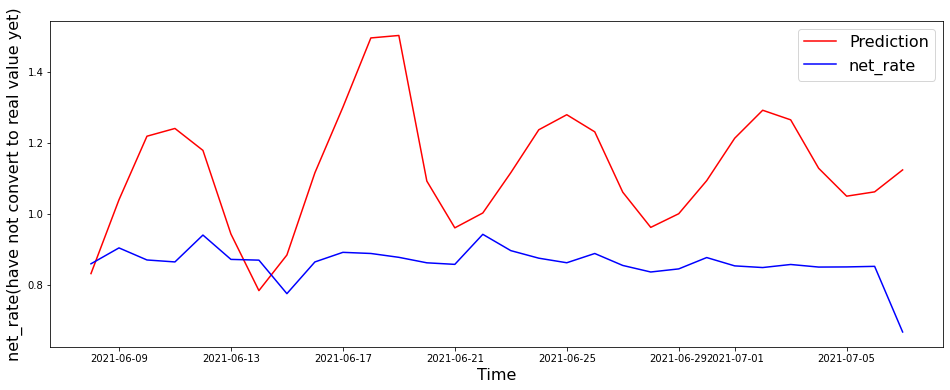

In [111]:
plt.figure(figsize=(16,6))
plt.xlabel('Time', fontsize=16)
plt.ylabel('net_rate(have not convert to real value yet)', fontsize=16)
plt.plot(forecast['forecast'], color='red')
plt.plot(forecast['actual'], color='blue')
plt.legend(['Prediction', 'net_rate'], fontsize=16)
plt.show()

In [112]:
# function for mape
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape
# Metrics

# mean squared error
mse = mean_squared_error(forecast['forecast'], forecast['actual'])

# root mean squared error
rmse = sqrt(mse)

# mean absolute percent error
mape = MAPE(forecast['forecast'], forecast['actual'])

# mean absolute error
mae = mean_absolute_error(forecast['forecast'], forecast['actual'])



# median absolute error
MDAE = np.median(abs(forecast['forecast']-forecast['actual']))

# median absolute percent error
MDAPE = np.median((np.abs(np.subtract(forecast['forecast'], forecast['actual'])/ forecast['actual']))) * 100

index=['mse','rmse','mae','mape','mdae','mdape']
metrics = pd.DataFrame([mse,rmse,mae,mape,MDAE,MDAPE],columns={'metrics'})
metrics.index = index
metrics

,metrics
mse,0.096447
rmse,0.310559
mae,0.269811
mape,22.632073
mdae,0.234874
mdape,26.100200
